<a href="https://colab.research.google.com/github/kodykerbox/COVID_HAWAII/blob/master/Copy_of_Covid_19_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid-19 Analysis - 4/19/20 by KK

Source: The original code for the national data is from Noah Gift's book on Minimal Python. Github Source - https://github.com/debasisb/minimal-python/blob/master/Chapter7_data_science.ipynb


Import pandas and create a dataframe df for the US Covid-19 data from the NY Times GitHub content

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head(20)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


Display the columns of the data frame df. Shape is the dimensions of the data frame selected or the # rows and # of columns

In [0]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [0]:
df.shape

(2273, 5)

The Seaborn visualization package, is a plotting and graphical package that is used to display data on histograms, scatterplot etc.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


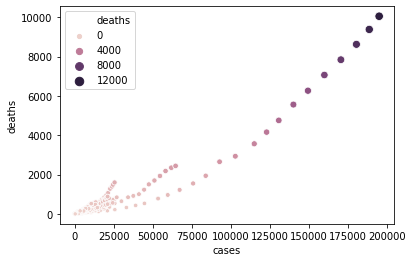

In [4]:
import seaborn as sns
sns.scatterplot (x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

Create an index of Dates from the source of the data till latest date

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-04-13', '2020-04-13', '2020-04-13', '2020-04-13',
               '2020-04-13', '2020-04-13', '2020-04-13', '2020-04-13',
               '2020-04-13', '2020-04-13'],
              dtype='datetime64[ns]', name='date', length=2329, freq=None)

Create the date for today, and the date two days ago (for the latest data for 2 days)

In [9]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-04-15
Two days ago 2020-04-13


Display the top 10 rows of data or head(10), bottom rows is tail()

In [10]:
df.loc[daybefore:today].head(10)

,state,fips,cases,deaths
date,,,,
2020-04-13,Alabama,1,3805,104
2020-04-13,Alaska,2,275,6
2020-04-13,American Samoa,60,0,0
2020-04-13,Arizona,4,3702,122
2020-04-13,Arkansas,5,1475,30
2020-04-13,California,6,24334,725
2020-04-13,Colorado,8,7691,308
2020-04-13,Connecticut,9,13381,602
2020-04-13,Delaware,10,1761,41


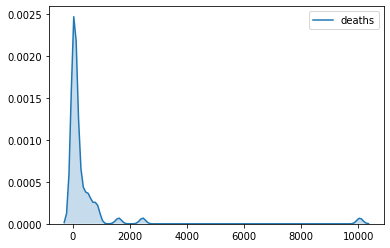

In [11]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

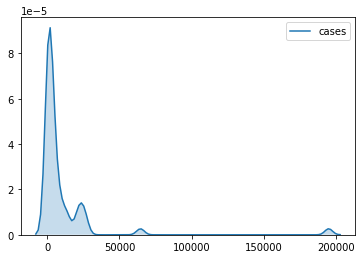

In [12]:
sns.kdeplot(df.loc[daybefore:today]["cases"], shade=True)

Create a data frame the identifies the top 10 states, sort by deaths and cases

In [13]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-04-13,New York,36,195031,10056
2020-04-13,New Jersey,34,64584,2443
2020-04-13,Michigan,26,25487,1601
2020-04-13,Louisiana,22,21016,884
2020-04-13,Massachusetts,25,26867,844
2020-04-13,Illinois,17,22025,800
2020-04-13,California,6,24334,725
2020-04-13,Connecticut,9,13381,602
2020-04-13,Pennsylvania,42,24295,563


In [17]:
current_df.shape

(56, 4)

In [18]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New Jersey',
 'Michigan',
 'Louisiana',
 'Massachusetts',
 'Illinois',
 'California',
 'Connecticut',
 'Pennsylvania',
 'Washington']

In [0]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [20]:
set(top_states_df.state.values)

{'California',
 'Connecticut',
 'Illinois',
 'Louisiana',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Washington'}

Use Seaborn to create a basic line plot for the top 10 states

<Figure size 1080x360 with 0 Axes>

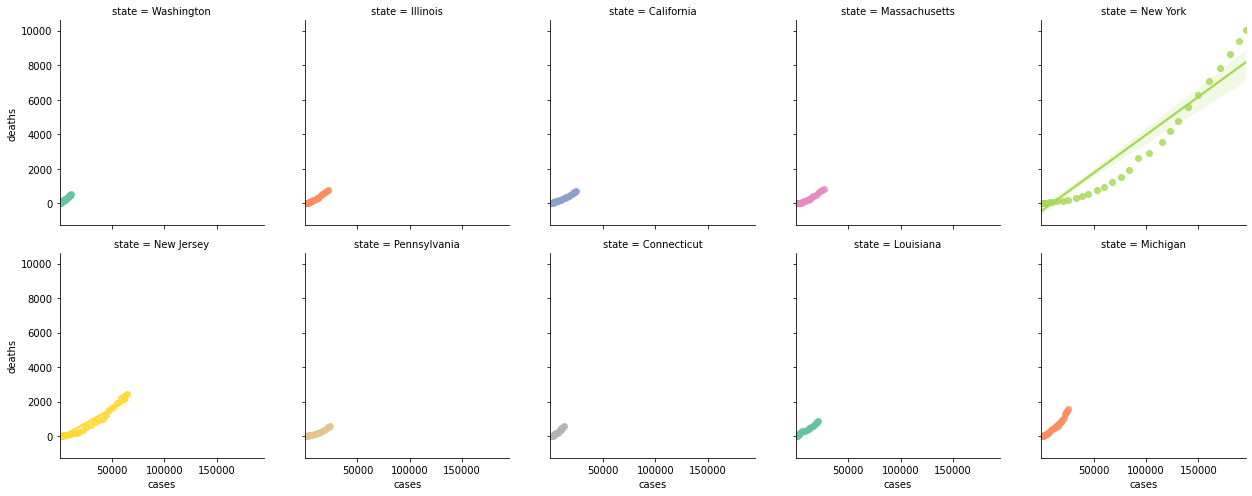

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [0]:
top_states_april_current_df = top_states_df.loc["2020-04-12":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_april_current_df.head(10)

,state,cases,deaths
date,,,
2020-04-12,New York,188694,9385
2020-04-12,New Jersey,61850,2350
2020-04-12,Michigan,24494,1486
2020-04-12,Louisiana,20595,840
2020-04-12,Massachusetts,25475,756
2020-04-12,Illinois,20852,727
2020-04-12,California,23323,676
2020-04-12,Connecticut,12035,554
2020-04-12,Pennsylvania,22955,525


Use another popular graphical tool called Plotly. This shows a scatter plot for the month of April for the top 10 states

In [25]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_april_current_df, x=top_states_april_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

NameError: ignored

Import State Level Data for Hawaii from national dataset

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
Hawaii_df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
Hawaii_df.tail(15)

,date,cases,deaths
1456,2020-03-29,175,0
1511,2020-03-30,204,0
1566,2020-03-31,224,1
1621,2020-04-01,258,1
1676,2020-04-02,283,2
1731,2020-04-03,317,3
1786,2020-04-04,349,3
1841,2020-04-05,369,4
1896,2020-04-06,385,5
1951,2020-04-07,408,5


Import County Level Data for Hawaii from county dataset

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
df.tail(15)

,date,county,cases,deaths
46392,2020-04-10,Hawaii,31,0
46393,2020-04-10,Honolulu,343,5
46394,2020-04-10,Kauai,19,0
46395,2020-04-10,Maui,66,3
46396,2020-04-10,Unknown,4,0
49023,2020-04-11,Hawaii,34,0
49024,2020-04-11,Honolulu,348,5
49025,2020-04-11,Kauai,19,0
49026,2020-04-11,Maui,80,3
49027,2020-04-11,Unknown,3,0


Create a data frame for Maui County and display data for past 15 days

In [24]:
Maui_County_df = df[df["county"]== "Maui"]
Maui_County_df.tail(15)

KeyError: ignored

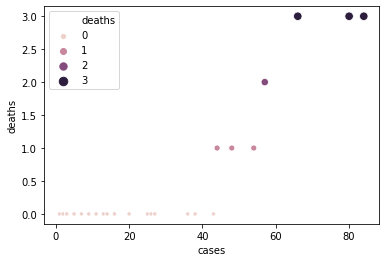

In [0]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Maui_County_df)

<Figure size 1080x360 with 0 Axes>

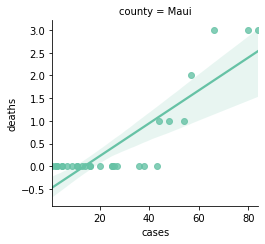

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Maui_County_df)
ax.fig.subplots_adjust(wspace=.2)

Create a data frame for Honolulu County and display data for past 15 days

In [0]:
Honolulu_County_df = df[df["county"]== "Honolulu"]
Honolulu_County_df.tail(15)

,date,county,cases,deaths
18134,2020-03-29,Honolulu,119,0
20144,2020-03-30,Honolulu,139,0
22248,2020-03-31,Honolulu,157,1
24427,2020-04-01,Honolulu,182,1
26667,2020-04-02,Honolulu,206,2
28969,2020-04-03,Honolulu,237,2
31332,2020-04-04,Honolulu,266,2
33740,2020-04-05,Honolulu,281,2
36194,2020-04-06,Honolulu,292,4
38686,2020-04-07,Honolulu,312,4


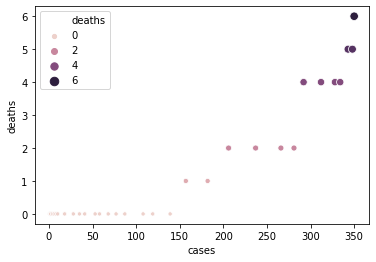

In [0]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Honolulu_County_df)

<Figure size 1080x360 with 0 Axes>

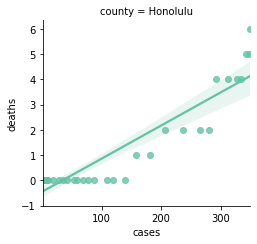

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Honolulu_County_df)
ax.fig.subplots_adjust(wspace=.2)

In [23]:
Kauai_County_df = df[df["county"]== "Kauai"]
Kauai_County_df.tail()

KeyError: ignored

In [26]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Kauai_County_df)

NameError: ignored